### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [129]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [130]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


### Rescaling The Image

In [0]:
x_train=x_train/255
x_test=x_test/255

### Building the model


In [0]:
model=Sequential()

In [0]:
model.add(Convolution2D(32,3,3,input_shape=(32,32,3),activation='relu',padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

In [0]:
model.add(Convolution2D(64,3,3,activation='relu',padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 11, 11, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

### Image Preprocessing


In [141]:
model.fit(x_train,y_train,batch_size=32,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6458 - accuracy: 0.4009
Epoch 2/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3723 - accuracy: 0.5058
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2824 - accuracy: 0.5385
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2220 - accuracy: 0.5629
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1724 - accuracy: 0.5818
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1237 - accuracy: 0.5984
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0866 - accuracy: 0.6135
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0587 - accuracy: 0.6252
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0288 - accuracy: 0.6331
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.006

### Checking Test Accuracy

In [142]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0932 - accuracy: 0.6162


In [143]:
test_loss, test_accuracy = model.evaluate(x_train, y_train)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.8641 - accuracy: 0.6928


### Train Accuracy 69% and Test Accuracy is 61%





In [144]:
num_classes = len(np.unique(y_train))
num_classes

10

### Saving and Testing the model

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [0]:
model.save('cifar10.h5')

In [0]:
from tensorflow.keras.models import load_model

In [0]:
classifier=load_model('cifar10.h5')

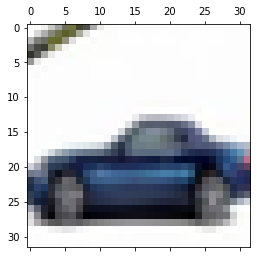

In [165]:
plt.matshow(x_test[105])

In [0]:
prediction=model.predict(x_test)

In [166]:
pr=prediction[105]
np.argmax(pr)

1

In [164]:
y_test[105]

array([1])

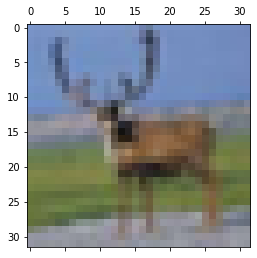

In [169]:
plt.matshow(x_test[159])

In [170]:
pr=prediction[159]
np.argmax(pr)

4

In [171]:
y_test[159]

array([4])